In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import pmdarima as pm

1)

In [3]:
df = pd.read_csv("employment.csv")

2)

In [4]:
df.head(4)

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1


3)

In [5]:
df = df.dropna()
df = df.drop_duplicates()


4)

On va utiliser la méthode des bornes (Q1 - 1.5*IQR et Q3 + 1.5*IQR)

In [6]:
df = df[(df["Construction"] > df["Construction"].quantile(0.25) - 1.5*(df["Construction"].quantile(0.75) - df["Construction"].quantile(0.25))) & (df["Construction"] < df["Construction"].quantile(0.75) + 1.5*(df["Construction"].quantile(0.75) - df["Construction"].quantile(0.25)))]
df.shape

(113, 17)

5)

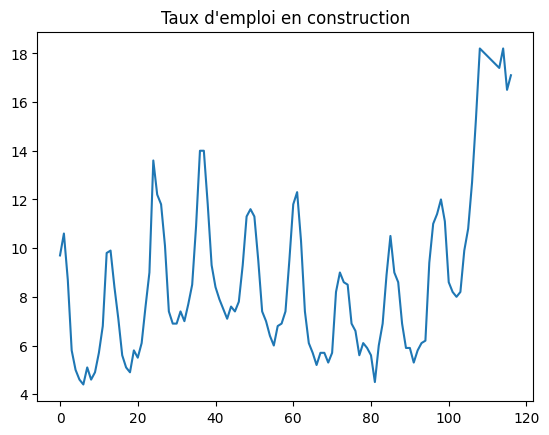

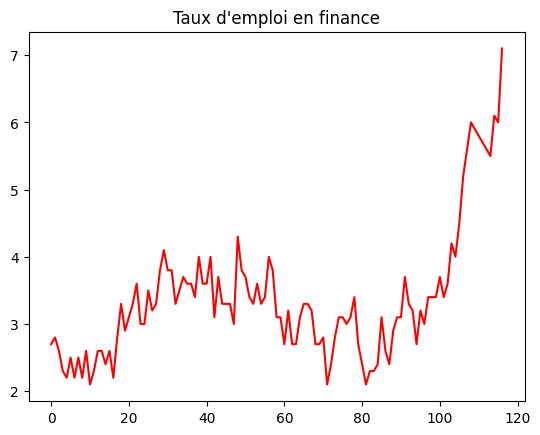

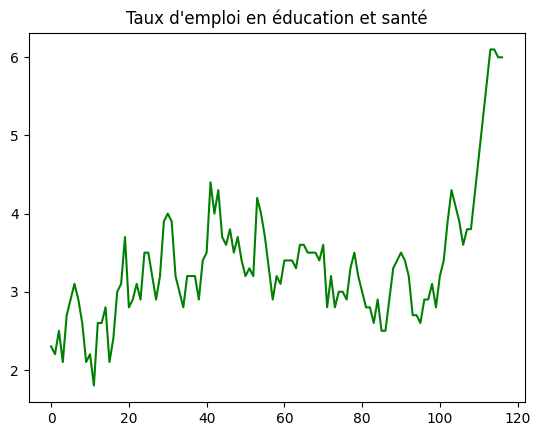

In [7]:
plt.plot(df["Construction"])
plt.title("Taux d'emploi en construction")
plt.show()
plt.plot(df["Finance"], color='r')
plt.title("Taux d'emploi en finance")
plt.show()
plt.plot(df["Education and Health"], color='g')
plt.title("Taux d'emploi en éducation et santé")
plt.show()

6)

In [8]:
df[["Finance"]].describe()

,Finance
count,113.000000
mean,3.289381
std,0.875496
min,2.100000
25%,2.700000
50%,3.200000
75%,3.600000
max,7.100000


7)

In [9]:
coeff_corr = []
for i in range (1,(len(df.keys()))):
    coeff_corr.append((df.keys()[i], np.corrcoef(df["Finance"],df[df.keys()[i]])[0,1]))

print(coeff_corr)

[('Agriculture', 0.20335288263800422), ('Business services', 0.7650274941472072), ('Construction', 0.6821750928697573), ('Durable goods manufacturing', 0.8363270045972955), ('Education and Health', 0.7737499845023511), ('Finance', 1.0), ('Government', 0.6257559881774469), ('Information', 0.7436712301490226), ('Leisure and hospitality', 0.8038857604879719), ('Manufacturing', 0.8542905800236757), ('Mining and Extraction', 0.5270122632939425), ('Nondurable goods manufacturing', 0.839167057712991), ('Other', 0.7446504806986105), ('Self-employed', 0.7864035029476578), ('Transportation and Utilities', 0.8251126251599282), ('Wholesale and Retail Trade', 0.8445326343988077)]


8)

In [10]:
date_2005 = []
for i in range (len(df["datestamp"])):
    if re.match("2005", df.iloc[i]["datestamp"]):
        date_2005.append(df.iloc[i]["datestamp"])
df_2005 = df[df["datestamp"].isin(date_2005)]
df_2005

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
60,2005-01-01,13.2,7.6,11.8,5.1,3.4,2.7,2.6,5.4,8.7,5.3,4.9,5.7,4.7,3.2,5.0,6.3
61,2005-02-01,9.9,7.2,12.3,5.1,3.4,3.2,2.3,6.5,8.8,5.3,4.0,5.8,5.3,3.4,4.4,6.2
62,2005-03-01,11.8,6.5,10.3,4.8,3.4,2.7,2.2,6.0,8.3,5.3,5.2,6.1,5.0,2.9,4.8,5.6
63,2005-04-01,6.9,5.7,7.4,4.3,3.3,2.7,2.3,5.9,7.7,4.8,2.9,5.6,4.9,2.4,4.7,5.4
64,2005-05-01,5.3,5.9,6.1,4.1,3.6,3.1,2.1,4.7,7.7,4.5,2.4,5.2,5.0,2.7,4.1,5.4
65,2005-06-01,5.2,5.8,5.7,4.3,3.6,3.3,3.2,5.0,7.6,4.4,4.0,4.6,4.6,2.4,4.5,5.7
66,2005-07-01,4.7,6.3,5.2,5.5,3.5,3.3,3.3,4.2,7.4,5.3,3.7,4.9,4.2,2.5,3.9,5.6
67,2005-08-01,7.1,5.7,5.7,4.5,3.5,3.2,3.2,4.6,6.8,4.7,2.0,4.9,4.8,2.3,3.3,5.3
68,2005-09-01,9.5,6.7,5.7,4.2,3.5,2.7,2.7,4.9,7.3,4.7,2.0,5.5,4.9,2.6,3.7,4.9
69,2005-10-01,6.7,5.8,5.3,4.6,3.4,2.7,2.4,4.8,6.8,4.8,0.3,5.3,5.0,2.3,4.4,4.9


9)

D'après la courbe de finance, on choisit un modèle multiplicatif.

In [11]:
ct = np.mean(df["Finance"])
st = np.mean([df.iloc[i]["Finance"]/ct for i in range (len(df["Finance"]))])
et = np.mean([df.iloc[i]["Finance"]/(ct*st) for i in range (len(df["Finance"]))])


10)

In [12]:
train_data = df["Finance"]
model = pm.auto_arima(train_data)
print(model.summary())

C:\Users\cabro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\cabro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\cabro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\cabro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  113
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -49.512
Date:                Wed, 12 Mar 2025   AIC                            105.024
Time:                        14:18:46   BIC                            113.180
Sample:                             0   HQIC                           108.333
                                - 113                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0365      0.025      1.436      0.151      -0.013       0.086
ma.L1         -0.3082      0.096     -3.226      0.001      -0.495      -0.121
sigma2         0.1416      0.019      7.501      0.0

C:\Users\cabro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Ainsi, p = 0, d = 1 et q = 1.